In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (13, 3)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

In [3]:
# loading the dataset

data = pd.read_csv("car_data.csv")

In [4]:
data.head()

,name,year,selling_price,km_driven,fuel_type,seller_type,transmission_type,num_of_ownership,mileage,engine,max_power,torque,num_of_seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# size of the dataset

data.shape

(8123, 13)

In [6]:
# checking for null values

data.isnull().sum()

name                   0
year                   0
selling_price          0
km_driven              0
fuel_type              0
seller_type            0
transmission_type      0
num_of_ownership       0
mileage              221
engine               221
max_power            215
torque               222
num_of_seats         221
dtype: int64

In [7]:
# dropping the Nan values

data.dropna(inplace = True)
data.isnull().sum()

name                 0
year                 0
selling_price        0
km_driven            0
fuel_type            0
seller_type          0
transmission_type    0
num_of_ownership     0
mileage              0
engine               0
max_power            0
torque               0
num_of_seats         0
dtype: int64

In [8]:
data.shape

(7901, 13)

In [9]:
# dropping the rows whose mileage is 0, as mileage of a vehicle should not be 0

index_mileage = data[data['mileage'] == '0.0 kmpl'].index.tolist()
data.drop(index = index_mileage, inplace = True)
data.shape

(7884, 13)

In [10]:
# creating two new columns "car_company" & "variant" from "name" column and dropping "name" column

data['car_company'] = data['name'].apply(lambda x: x.split(' ', 1)).str[0]


data['car_company'] = data['car_company'].apply(lambda x: 'Land Rover' if x == 'Land' else x)
data['car_company'] = data['car_company'].apply(lambda x: 'MG Hector' if x == 'MG' else x)
data['car_company'] = data['car_company'].apply(lambda x: 'Ashok Leyland' if x == 'Ashok' else x)

data['variant'] = data['name'].apply(lambda x: x.split(' ', 1)).str[1]
data['variant'] = data['variant'].apply(lambda x: x)

data.drop(columns = 'name', inplace = True)
data.head()

,year,selling_price,km_driven,fuel_type,seller_type,transmission_type,num_of_ownership,mileage,engine,max_power,torque,num_of_seats,car_company,variant
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII


In [11]:
# creating a new column "car_age" and dropping "year" column

from datetime import date

current_date = date.today()
current_year = current_date.year
data['car_age'] = current_year - data['year']
data.drop(columns = 'year', inplace = True)
data.head()

,selling_price,km_driven,fuel_type,seller_type,transmission_type,num_of_ownership,mileage,engine,max_power,torque,num_of_seats,car_company,variant,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition,7
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi,15
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel,11
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII,14


In [12]:
# removing text from "mileage" column

data['mileage'] = data['mileage'].apply(lambda x: x[:-5])
data.head()

,selling_price,km_driven,fuel_type,seller_type,transmission_type,num_of_ownership,mileage,engine,max_power,torque,num_of_seats,car_company,variant,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition,7
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi,15
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel,11
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII,14


In [13]:
# removing text from "engine" column

data['engine'] = data['engine'].apply(lambda x: x[:-2])
data.head()

,selling_price,km_driven,fuel_type,seller_type,transmission_type,num_of_ownership,mileage,engine,max_power,torque,num_of_seats,car_company,variant,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition,7
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi,15
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel,11
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII,14


In [14]:
# removing text from "max_power" column

data['max_power'] = data['max_power'].apply(lambda x: x[:-3])
data.head()

,selling_price,km_driven,fuel_type,seller_type,transmission_type,num_of_ownership,mileage,engine,max_power,torque,num_of_seats,car_company,variant,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition,7
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi,15
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel,11
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII,14


In [15]:
# dropping "torque" column

data.drop(columns = 'torque', inplace = True)
data.head()

,selling_price,km_driven,fuel_type,seller_type,transmission_type,num_of_ownership,mileage,engine,max_power,num_of_seats,car_company,variant,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0,Maruti,Swift Dzire VDI,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,Skoda,Rapid 1.5 TDI Ambition,7
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0,Honda,City 2017-2020 EXi,15
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0,Hyundai,i20 Sportz Diesel,11
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0,Maruti,Swift VXI BSIII,14


In [16]:
# checking the datatype of all columns

data.dtypes

selling_price          int64
km_driven              int64
fuel_type             object
seller_type           object
transmission_type     object
num_of_ownership      object
mileage               object
engine                object
max_power             object
num_of_seats         float64
car_company           object
variant               object
car_age                int64
dtype: object

In [17]:
# converting the datatypes of columns into there appropriate datatypes

data['mileage'] = data['mileage'].astype('float64')
data['engine'] = data['engine'].astype('int64')
data['max_power'] = data['max_power'].astype('float64')
data['num_of_seats'] = data['num_of_seats'].astype('int64')

data.dtypes

selling_price          int64
km_driven              int64
fuel_type             object
seller_type           object
transmission_type     object
num_of_ownership      object
mileage              float64
engine                 int64
max_power            float64
num_of_seats           int64
car_company           object
variant               object
car_age                int64
dtype: object

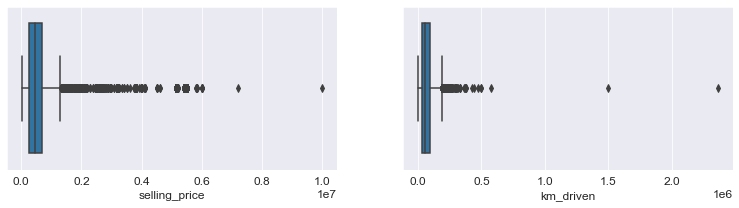

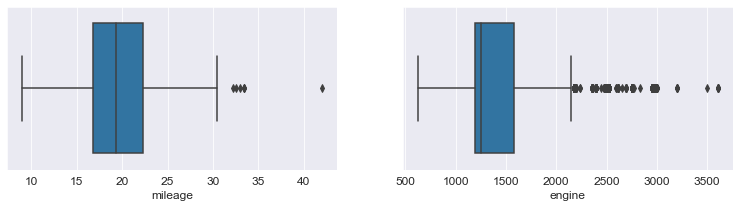

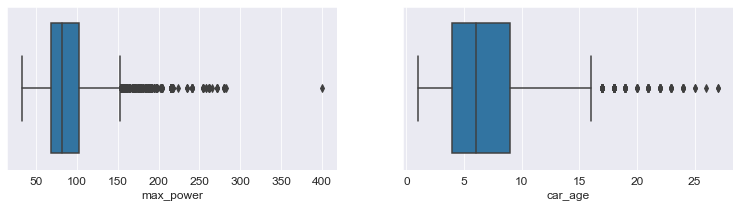

In [18]:
# checking for extreme outliers

num_cols = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'car_age']

i = 0
while i < 6:
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x = num_cols[i], data = data)
    i += 1
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x = num_cols[i], data = data)
    i += 1
    
    plt.show()

In [19]:
# handling extreme outliers using z-score method

data = data[data[num_cols].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
data.shape

(7440, 13)

In [20]:
# dimensionality reduction

variant_count = data.groupby(['car_company','variant'])['variant'].agg('count').sort_values(ascending = False)
variant_count_reduction =  variant_count[variant_count <= 5]

variant_count_reduction_index = variant_count_reduction.index.tolist()
list_variant_reduction = list()
for i in variant_count_reduction_index:
    list_variant_reduction.append(i[1])

data['variant'] = data['variant'].apply(lambda x: 'Others' if x in list_variant_reduction else x)

In [21]:
# arranging the columns in an organised order

data = data[['car_company', 'variant', 'car_age', 'km_driven', 'fuel_type', 'seller_type','transmission_type', 'num_of_ownership', 'mileage', 'engine',
       'max_power', 'num_of_seats', 'selling_price']]
data.head(10)

,car_company,variant,car_age,km_driven,fuel_type,seller_type,transmission_type,num_of_ownership,mileage,engine,max_power,num_of_seats,selling_price
0,Maruti,Swift Dzire VDI,7,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,450000
1,Skoda,Others,7,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,370000
2,Honda,City 2017-2020 EXi,15,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,158000
3,Hyundai,Others,11,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,225000
4,Maruti,Others,14,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,130000
5,Hyundai,Others,4,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,440000
6,Maruti,Wagon R LXI DUO BSIII,14,175000,LPG,Individual,Manual,First Owner,17.30,1061,57.50,5,96000
8,Toyota,Others,10,90000,Diesel,Individual,Manual,First Owner,23.59,1364,67.10,5,350000
9,Ford,Figo Diesel Celebration Edition,8,169000,Diesel,Individual,Manual,First Owner,20.00,1399,68.10,5,200000
10,Renault,Duster 110PS Diesel RxL,7,68000,Diesel,Individual,Manual,Second Owner,19.01,1461,108.45,5,500000


In [22]:
# creating a new csv file of cleaned data

data.to_csv('car_data_cleaned.csv', index = False)